In [174]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from torch import optim
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


In [62]:
concrete_data = pd.read_csv('cemento.csv', delimiter=';')
concrete_data.head()


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7.0,13.710000
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7.0,14.840000
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3.0,21.780001
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28.0,33.689999
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000


In [63]:
min_d = concrete_data.min()
max_d = concrete_data.max()
normalized_df=(concrete_data - min_d)/(max_d - min_d)
normalized_df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,0.342466,0.000000,0.000000,0.504792,0.000000,0.901163,0.476668,0.016484,0.141772
1,0.442466,0.000000,0.000000,0.510383,0.000000,0.844186,0.439789,0.016484,0.155849
2,0.343151,0.000000,0.493753,0.195687,0.440994,0.543023,0.740090,0.005495,0.242307
3,0.160731,0.037841,0.861569,0.279553,0.127329,0.596802,0.658304,0.074176,0.390681
4,0.136986,0.595437,0.819590,0.640575,0.310559,0.055233,0.215755,0.074176,0.352809


In [173]:
def desnormalizar(x):
    return x * (max_d[-1] - min_d[-1]) + min_d[-1]

In [172]:
def normalizar(x):
    return (x - min_d)/(max_d - min_d)

In [64]:
desnormalized_df = normalized_df * (max_d - min_d) + min_d
desnormalized_df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7.0,13.710000
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7.0,14.840000
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3.0,21.780001
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28.0,33.689999
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000


In [90]:

normal_train = normalized_df.iloc[:,:8]
normal_label = normalized_df.iloc[:,-1:]


,ConcreteCompressiveStrength
0,0.141772
1,0.155849
2,0.242307
3,0.390681
4,0.352809
5,0.659275
6,0.715460
7,0.126199
8,0.615298
9,0.235829


In [175]:
xtrain, xtest, ytrain, ytest = train_test_split(normal_train, normal_label, test_size = 0.15, random_state = 1)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.176, random_state = 1)


(154, 8)

In [185]:
xt_train = torch.tensor(xtrain.values).type(torch.float)
yt_train = torch.tensor(ytrain.values).type(torch.float)
xt_val = torch.tensor(xval.values).type(torch.float)
yt_val = torch.tensor(yval.values).type(torch.float)
xt_test = torch.tensor(xtest.values).type(torch.float)
yt_test = torch.tensor(ytest.values).type(torch.float)


In [192]:

model = nn.Sequential(nn.Linear(8, 30),
                      nn.ReLU(),
                      nn.Linear(30, 20),
                      nn.ReLU(),
                      nn.Linear(20, 10),
                      nn.ReLU(),
                      nn.Linear(10, 1),
                      #nn.LogSoftmax(dim=1))
                      nn.Sigmoid())

criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

train_loss =[]
val_loss=[]
epochs = 50000
for e in range(epochs):

    ###
    # TODO: Training pass
    # Clear the gradients, do this because gradients are accumulated
    optimizer.zero_grad()
    output_t = model(xt_train)
    loss = criterion(output_t, yt_train)
    if e % 1000 == 0:
        print('epoch: ', e,' loss: ', loss.item())
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        model.eval()
        output_v = model(xt_val)
        loss_v = criterion(output_v, yt_val)
    
    model.train()
    if e % 100 == 0:
            train_loss.append(loss.item())
            val_loss.append(loss_v.item())

epoch:  0  loss:  0.056208353489637375
epoch:  1000  loss:  0.04439845681190491
epoch:  2000  loss:  0.04370599985122681
epoch:  3000  loss:  0.04358750954270363
epoch:  4000  loss:  0.04348976910114288
epoch:  5000  loss:  0.043382566422224045
epoch:  6000  loss:  0.043275248259305954
epoch:  7000  loss:  0.043153077363967896
epoch:  8000  loss:  0.04300149157643318
epoch:  9000  loss:  0.04280450940132141
epoch:  10000  loss:  0.042543262243270874
epoch:  11000  loss:  0.0421878844499588
epoch:  12000  loss:  0.04168420284986496
epoch:  13000  loss:  0.04095795378088951
epoch:  14000  loss:  0.03989391401410103
epoch:  15000  loss:  0.038310177624225616
epoch:  16000  loss:  0.03593340143561363
epoch:  17000  loss:  0.03248533979058266
epoch:  18000  loss:  0.02813483029603958
epoch:  19000  loss:  0.02391834370791912
epoch:  20000  loss:  0.020968163385987282
epoch:  21000  loss:  0.019314739853143692
epoch:  22000  loss:  0.018435198813676834
epoch:  23000  loss:  0.017933560535311

In [187]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"


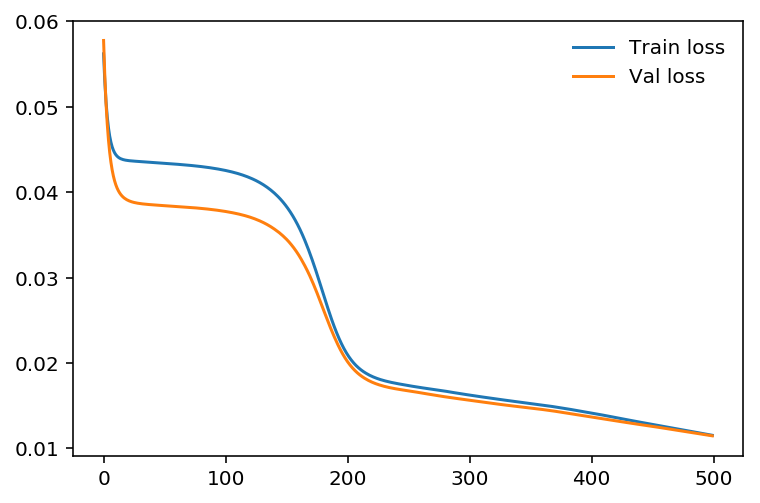

In [193]:
plt.plot(train_loss, label="Train loss")
plt.plot(val_loss, label="Val loss")
plt.legend(frameon = False)

In [194]:
with torch.no_grad():
    model.eval()
    output_t = model.forward(xt_test)
    loss_t = criterion(output_t, yt_test)
    print(loss_t.item())

model.train()

0.011645139195024967


Sequential(
  (0): Linear(in_features=8, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=1, bias=True)
  (7): Sigmoid()
)

In [195]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [179]:

d = pd.DataFrame(output.detach().numpy())
d[1] = pd.DataFrame(label_tensor.detach().numpy())
d.head()

,0,1
0,0.132540,0.141772
1,0.169053,0.155849
2,0.243413,0.242307
3,0.328990,0.390681
4,0.375306,0.352809


In [158]:
d.head()

,0,1
0,0.132540,0.141772
1,0.169053,0.155849
2,0.243413,0.242307
3,0.328990,0.390681
4,0.375306,0.352809


In [146]:
criterion(output, label_tensor).item()

0.006379507947713137

In [180]:
d.shape

(1030, 2)